In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 
HTML(style)

In [28]:
np.random.seed(0)

# Загрузка train и test датасетов


In [9]:
iris_train = pd.read_csv('C:/Users/gserb/Downloads/train_iris.csv')
iris_test = pd.read_csv('C:/Users/gserb/Downloads/test_iris.csv')

In [7]:
iris_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


# Удаление из таблицы фичей колонки с данными о целевой переменной

In [15]:
X_train = iris_train.drop(['Unnamed: 0', 'species'], axis = 1)
y_train = iris_train.species
X_test = iris_test.drop(['Unnamed: 0', 'species'], axis = 1)
y_test = iris_test.species

# Классификация тренировочного датасета

In [16]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')


In [17]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

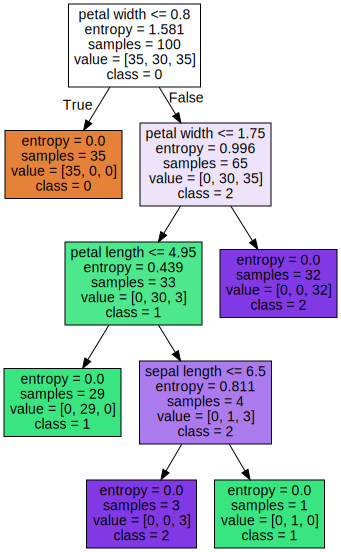

In [21]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X_train),
class_names=['0', '1', '2'], filled=True))
display(SVG(graph.pipe(format='svg')))

# Подбор наиболее оптимального значения глубины дерева решений в классификаторе с помощью кроссвалидации

In [22]:
max_depth_values = range(1, 100)

In [23]:
scores_data = pd.DataFrame()

In [25]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score =  clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5) .mean()

    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score' : [train_score], 'test_score' : [test_score], 'cross_val_score': [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [26]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.92,0.96
0,5,1.00,0.92,0.96


C:\Users\gserb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gserb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='max_depth', ylabel='score'>

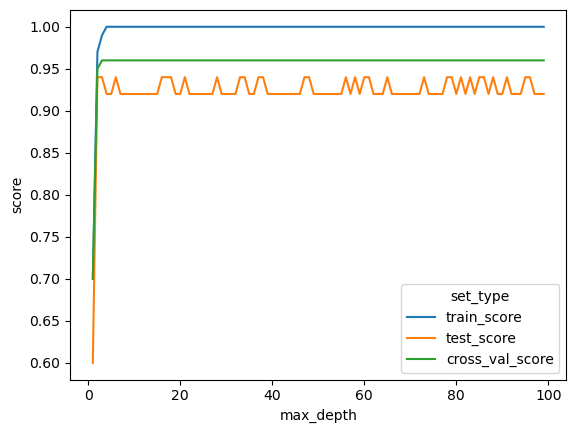

In [29]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score','test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

sns.lineplot(x ='max_depth', y ='score', hue ='set_type', data = scores_data_long)

In [32]:
scores_data_long[scores_data_long['set_type'] == 'cross_val_score']


,max_depth,set_type,score
198,1,cross_val_score,0.70
199,2,cross_val_score,0.95
200,3,cross_val_score,0.96
201,4,cross_val_score,0.96
202,5,cross_val_score,0.96
...,...,...,...
292,95,cross_val_score,0.96
293,96,cross_val_score,0.96
294,97,cross_val_score,0.96
295,98,cross_val_score,0.96


In [33]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 200)


In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=200)

In [46]:
clf.score(X_test, y_test)

0.92